In [2]:
pip install matplotlib


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------------------- ------- 6.3/7.8 MB 32.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 31.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 29.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Squared Error (MSE): 269.29215187981106
Mean Absolute Error (MAE): 9.697560179447201


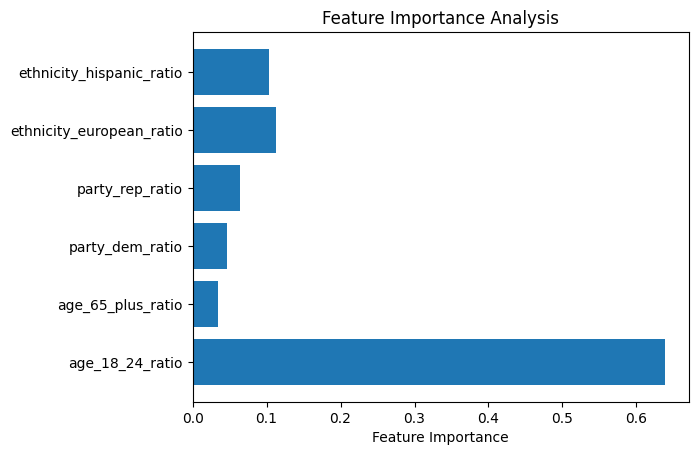

Predicted Turnout: 65.80%


In [30]:
# Load the dataset and select the top 20,000 rows
# Replace 'your_dataset.csv' with the actual file path to your dataset
data = pd.read_csv('NY_2022_prim_l2_vf_2020blocks.csv')

# Take only the top 20,000 rows
data = data.head(20000)

# Step 1: Calculate turnout rates for elections
data['turnout_2020_general'] = (data['g20201103'] / data['total_reg']) * 100

# Fill missing values with 0
data.fillna(0, inplace=True)

# Step 2: Feature Engineering
data['age_18_24_ratio'] = (data['age_18_19'] + data['age_20_24']) / data['total_reg']
data['age_65_plus_ratio'] = (data['age_65_74'] + data['age_75_84'] + data['age_85over']) / data['total_reg']
data['party_dem_ratio'] = data['party_dem'] / data['total_reg']
data['party_rep_ratio'] = data['party_rep'] / data['total_reg']
data['ethnicity_european_ratio'] = data['eth1_eur'] / data['total_reg']
data['ethnicity_hispanic_ratio'] = data['eth1_hisp'] / data['total_reg']

# Step 3: Define Features and Target Variable
features = [
    'age_18_24_ratio', 'age_65_plus_ratio', 'party_dem_ratio', 
    'party_rep_ratio', 'ethnicity_european_ratio', 'ethnicity_hispanic_ratio'
]
target = 'turnout_2020_general'

X = data[features]
y = data[target]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Step 7: Feature Importance
importance = model.feature_importances_
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.show()

# Step 8: Make Predictions for New Data
new_data = pd.DataFrame({
    'age_18_24_ratio': [0.1],
    'age_65_plus_ratio': [0.2],
    'party_dem_ratio': [0.4],
    'party_rep_ratio': [0.35],
    'ethnicity_european_ratio': [0.5],
    'ethnicity_hispanic_ratio': [0.1]
})
predicted_turnout = model.predict(new_data)
print(f"Predicted Turnout: {predicted_turnout[0]:.2f}%")


In [5]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------- -------------------------------- 2.9/16.2 MB 15.0 MB/s eta 0:00:01
   ---------- ----------------------------- 4.2/16.2 MB 10.1 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.2 MB 8.4 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.2 MB 7.8 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/16.2 MB 7.6 MB/s eta 0:00:02
   ------------------------ --------------- 9.7/16.2 MB 7.5 MB/s eta 0:00:01
   --------------------------- ------------ 11.0/16.2 MB 7.5 MB/s eta 0:00:01
   ------------------------------- -------- 12.6/16.2 MB 7.4 MB/s eta 0:00:01
   ----------------------------------- ---- 14.4/16.2 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 7.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")



Mean Squared Error (MSE): 269.29215187981106
Mean Absolute Error (MAE): 9.697560179447201
R-squared (R²): 0.7680347165523381
